In [1]:
exec(open("init_notebook.py").read())
%load_ext autoreload
%autoreload 2

current working dirC:\muktadir\pyns


In [21]:
logfile = "2-client-debug.log"
with open(logfile, 'w') as f:
    f.truncate()
logging.basicConfig(level=logging.DEBUG, filename=logfile)
print(f"Logging file at: {logfile}")

config = Configuration()
timeResolutionUnit = config.get('timeResolutionUnit')
network = Network.get()
nodeManager = NodeManager()
analyzer = AnalyzerTools()

Logging file at: 2-client-debug.log


In [28]:
nodeManager.createSimpleNodes(n=5, maxDeliveryRate=500, debug=True)

dict_values([<core.SimpleNode.SimpleNode object at 0x000002A2B2FA0D88>, <core.SimpleNode.SimpleNode object at 0x000002A2B2FA0388>, <core.SimpleNode.SimpleNode object at 0x000002A2B2FA0688>, <core.SimpleNode.SimpleNode object at 0x000002A2B2FA0308>, <core.SimpleNode.SimpleNode object at 0x000002A2B2FA0448>, <core.SimpleNode.SimpleNode object at 0x000002A2B2FEDBC8>, <core.SimpleNode.SimpleNode object at 0x000002A2B2FEDD88>, <core.SimpleNode.SimpleNode object at 0x000002A2B2FFF748>, <core.SimpleNode.SimpleNode object at 0x000002A2B2FFF8C8>, <core.SimpleNode.SimpleNode object at 0x000002A2B2FFFA08>, <core.SimpleNode.SimpleNode object at 0x000002A2B2FFFB48>, <core.SimpleNode.SimpleNode object at 0x000002A2B2FFFD08>])

In [29]:
randomNodes = nodeManager.getRandomNodes(5)
randomNodes2 = []
randomNodes2.append(nodeManager.createSimpleNode(maxDeliveryRate=500, debug=False))
randomNodes2.append(randomNodes[2]) 
randomNodes2.append(nodeManager.createSimpleNode(maxDeliveryRate=500, debug=False))

server = Server(-1)
server2 = Server(-2)

In [30]:
client = ConstClient(1, deliveryRate=10000, debug=True, timeResolutionUnit=timeResolutionUnit)
client2 = AIClient(2, delay_between_packets=5, max_outstanding_packets=10, debug=True)
path = network.createPath(client=client, nodes=randomNodes, server=server)
path2 = network.createPath(client=client2, nodes=randomNodes2, server=server2)

In [31]:
logging.info("path for client1:" + str([node.id for node in path.getNodesWithServer()]))
logging.info("path for client2:" + str([node.id for node in path2.getNodesWithServer()]))

In [32]:
simulator = EventSimulator(timeResolutionUnit=timeResolutionUnit, debug=True)
simulator.addClient(client)
# simulator.addClient(client2)


In [33]:
maxSteps = 150 # equivalent to maxStep timeResolution unit
simulator.run(maxSteps)

{4: {'qSzie': 0}, 1: {'qSzie': 0}, 6: {'qSzie': 0}, 10: {'qSzie': 0}, 7: {'qSzie': 0}}
{4: {'qSzie': 0}, 1: {'qSzie': 0}, 6: {'qSzie': 0}, 10: {'qSzie': 0}, 7: {'qSzie': 0}}
{4: {'qSzie': 0}, 1: {'qSzie': 0}, 6: {'qSzie': 0}, 10: {'qSzie': 0}, 7: {'qSzie': 0}}
{4: {'qSzie': 0}, 1: {'qSzie': 0}, 6: {'qSzie': 0}, 10: {'qSzie': 0}, 7: {'qSzie': 0}}
{4: {'qSzie': 0}, 1: {'qSzie': 0}, 6: {'qSzie': 0}, 10: {'qSzie': 0}, 7: {'qSzie': 0}}
{4: {'qSzie': 0}, 1: {'qSzie': 0}, 6: {'qSzie': 0}, 10: {'qSzie': 0}, 7: {'qSzie': 0}}
{4: {'qSzie': 0}, 1: {'qSzie': 0}, 6: {'qSzie': 0}, 10: {'qSzie': 0}, 7: {'qSzie': 0}}
{4: {'qSzie': 0}, 1: {'qSzie': 0}, 6: {'qSzie': 0}, 10: {'qSzie': 0}, 7: {'qSzie': 0}}
{4: {'qSzie': 0}, 1: {'qSzie': 0}, 6: {'qSzie': 0}, 10: {'qSzie': 0}, 7: {'qSzie': 0}}
{4: {'qSzie': 0}, 1: {'qSzie': 0}, 6: {'qSzie': 0}, 10: {'qSzie': 0}, 7: {'qSzie': 0}}
{4: {'qSzie': 0}, 1: {'qSzie': 0}, 6: {'qSzie': 0}, 10: {'qSzie': 0}, 7: {'qSzie': 0}}
{4: {'qSzie': 0}, 1: {'qSzie': 0}, 6: {'qSz

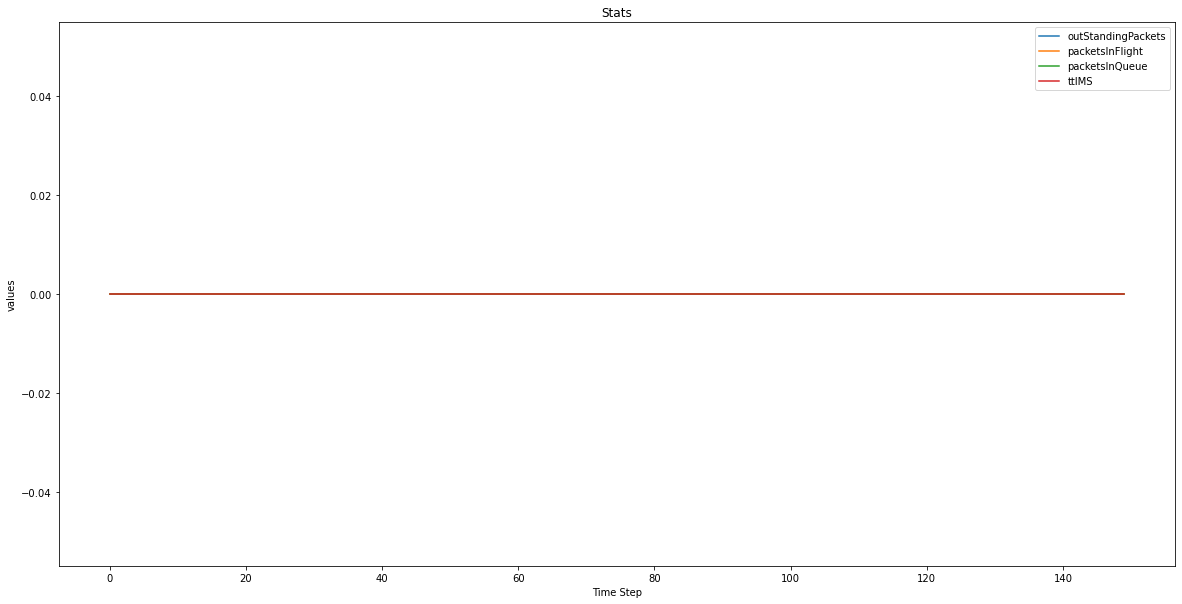

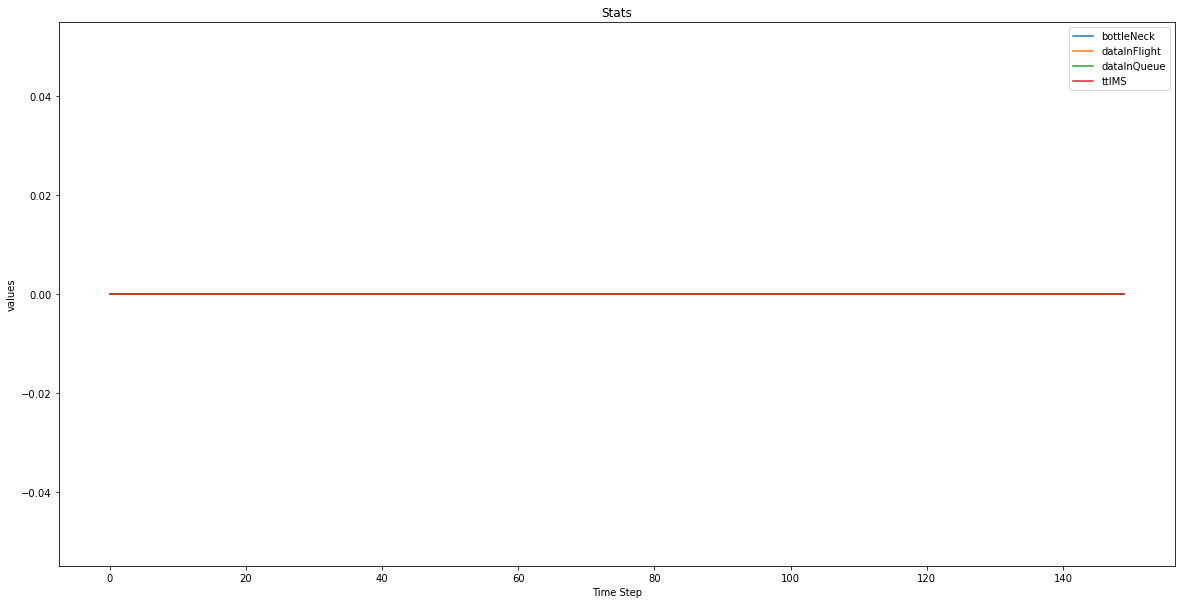

In [55]:

analyzer.createPlotsForTimeSteps(client.stats, ['outStandingPackets', 'packetsInFlight', 'packetsInQueue', 'ttlMS'])
analyzer.createPlotsForTimeSteps(client.stats, ['bottleNeck', 'dataInFlight', 'dataInQueue', 'ttlMS'])

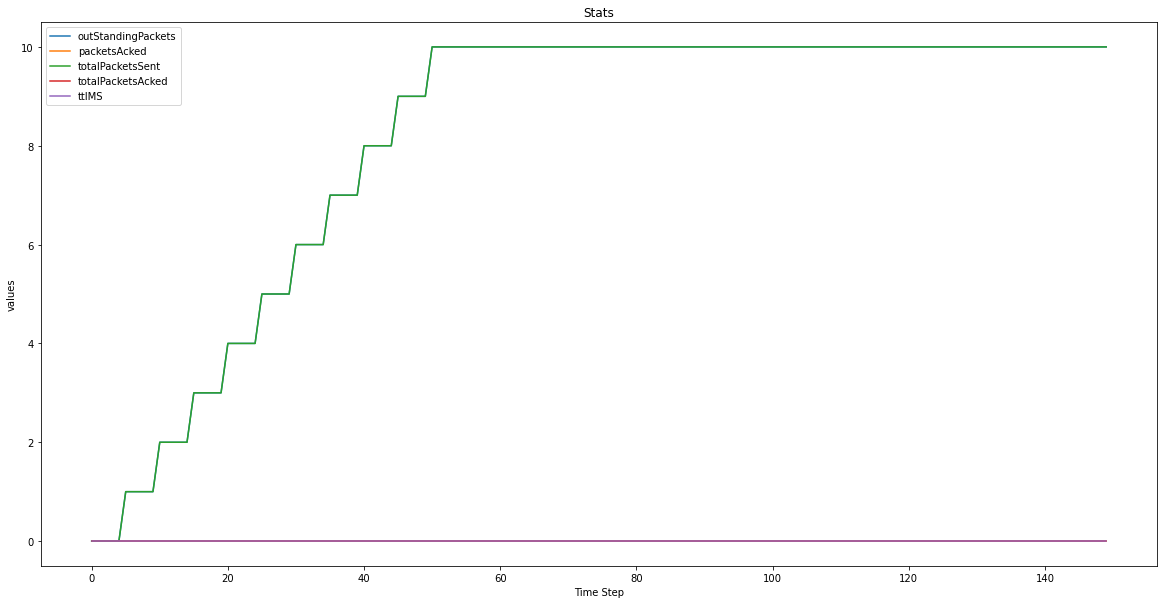

In [52]:

analyzer.createPlotsForTimeSteps(client2.stats, ['outStandingPackets', 'packetsAcked', 'totalPacketsSent', 'totalPacketsAcked', 'ttlMS'])

In [53]:
print(client2.path)

 
	id: 13 
	client: 2 
	nodes: , 21, 2, 22, -2 
	server: -2
